In [48]:
library('tidyquant', quietly = TRUE)
DATA_FOLDER <- '~/Resilio Sync/FXBootcamp/'
source(paste0(DATA_FOLDER,'/Code/tools/r-tools/data-utils.R'))

In [14]:
ASSET_LIST <- 'AssetsBCAMP-ALL'
asset_list <- get_asset_list(ASSET_LIST)
head(asset_list)

Name,Price,Spread,RollLong,RollShort,PIP,PIPCost,MarginCost,Leverage,LotAmount,Commission,Symbol
AUD/CAD,0.94081,0.00017,-0.1507,-0.2638,1e-04,0.075359,0,20.001,1000,0.3,AUD/CAD
AUD/CHF,0.70906,0.00009,0.4200,-0.7500,1e-04,0.099995,0,20.003,1000,0.3,AUD/CHF
AUD/JPY,77.81000,0.00900,0.1665,-0.4580,1e-02,0.091122,0,20.003,1000,0.3,AUD/JPY
AUD/NZD,1.05102,0.00003,-0.0877,-0.3507,1e-04,0.067449,0,19.999,1000,0.3,AUD/NZD
AUD/USD,0.70898,0.00009,-0.2600,-0.1000,1e-04,0.100000,0,20.000,1000,0.3,AUD/USD
CAD/CHF,0.75382,0.00029,0.3600,-0.7100,1e-04,0.099995,0,30.011,1000,0.3,CAD/CHF


In [16]:
prices_df <- get_daily_OHLC(asset_list$Name)
head(prices_df)

Ticker,Date,Open,High,Low,Close,Volume
AUDCAD,1999-01-01,0.94509,0.95165,0.93178,0.93743,0
AUDCAD,1999-01-05,0.93743,0.95440,0.93055,0.94820,0
AUDCAD,1999-01-06,0.94820,0.95612,0.93758,0.93959,0
AUDCAD,1999-01-07,0.93959,0.95300,0.92943,0.95010,0
AUDCAD,1999-01-08,0.95010,0.96630,0.94470,0.96135,0
AUDCAD,1999-01-12,0.95838,0.97117,0.95084,0.96201,0


In [50]:
#?lapply

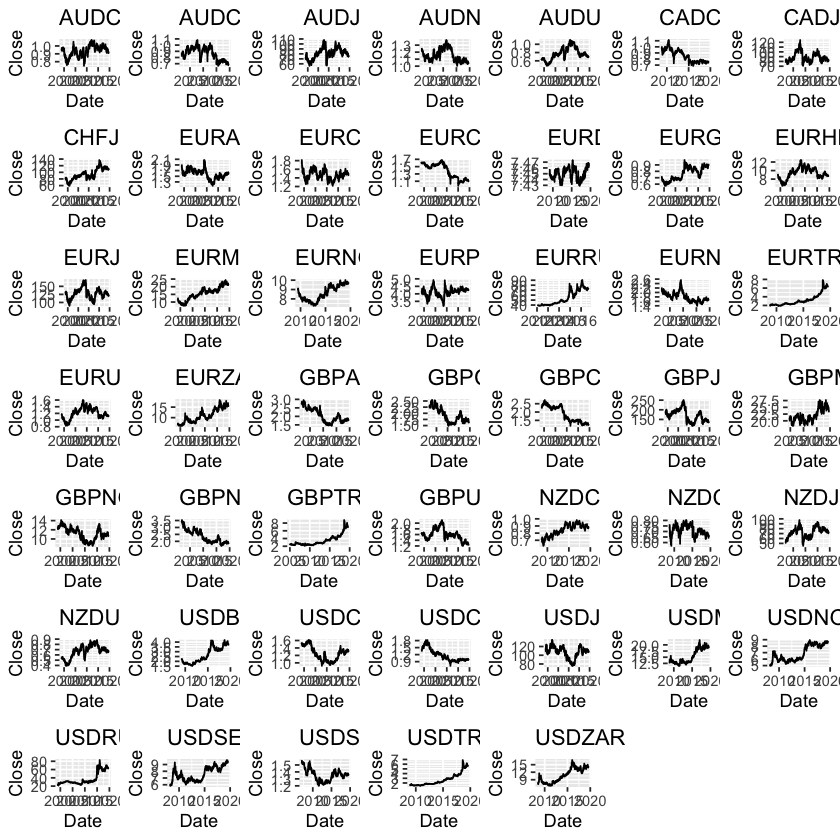

In [52]:
library(gridExtra)
# draw charts of all currencies
p <- list()
for (i in 1:dim(asset_list)[1]) {
  ticker <- (gsub('/', '', asset_list[i,1]))
  prices_df <- get_daily_OHLC(asset_list$Name)
  prices_df %>%
    filter(Ticker == ticker) %>%
    ggplot(aes(x = Date, y = Close)) +
    geom_line() +
    labs(title = ticker) -> p[[i]]
}

do.call(grid.arrange,p)

In [24]:
#columns <- colnames(prices_df)
tickers <- unique(c(prices_df$Ticker))